# Analyze A/B Test Results

## Table of Contents
* Part I - Probability
* Part II - A/B Test
* Part III - Regression

### Part I - Probability

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Now, read in the ab_data.csv data. Store it in df. Use your dataframe to answer the questions in Quiz 1 of the classroom.

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('/Users/quynhchou/Desktop/Jupyternotbook/Data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
len(df.query('converted == 1'))/len(df)

0.11965919355605512

In [8]:
print( str(np.round(len(df.query('converted == 1'))/len(df) *100 ,2)) +'%')

11.97%


In [9]:
df['converted'].mean()

0.11965919355605512

In [10]:
df['converted'].value_counts(1)[1]

0.11965919355605512

e. The number of times the new_page and treatment don't line up.

In [11]:
treat_old = df.query("group == 'treatment' and landing_page == 'old_page'" ).shape[0]
control_new = df.query("group == 'control' and landing_page == 'new_page'" ).shape[0]
control_new+treat_old

3893

In [12]:
treat_old = df[(df['group'] == 'treatment') & (df['landing_page']=='old_page')] # cach 2

f. Do any of the rows have missing values?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [14]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

2. For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to provide how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2

In [15]:
df1 = df.query("group=='treatment' and landing_page=='new_page'")
df2 = df1.append(df.query("group=='control' and landing_page=='old_page'"))


In [16]:
df01 = df.query("group=='treatment' and landing_page=='new_page'")
df02 = df.query("group=='control' and landing_page=='old_page'")
df2=pd.concat([df01,df02],axis=0)
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


3. Use df2 and the cells below to answer questions for Quiz3 in the classroom.

a. How many unique user_ids are in df2?

In [17]:
df2['user_id'].nunique()

290584

b. There is one user_id repeated in df2. What is it?

In [18]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat user_id?

In [19]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [21]:
df2.drop_duplicates(subset= 'user_id', keep='last', inplace= True)

4. Use df2 in the below cells to answer the quiz questions related to Quiz 4 in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the control group, what is the probability they converted?

In [23]:
c_prob=df2.query("group=='control'")['converted'].mean()
c_prob

0.1203863045004612

c. Given that an individual was in the treatment group, what is the probability they converted?

In [24]:
t_prob=df2.query("group=='treatment'")['converted'].mean()
t_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2.query("landing_page=='new_page'").shape[0]/df2.shape[0]

0.5000619442226688

In [26]:
df2['landing_page'].value_counts(1)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions? Write your response below.

No, it does not seem as though one page leads to more conversions. The new page actually led to a lower conversion rate than the old page, but the difference appears to be negligible.

## Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

1. For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of  pold  and  pnew , which are the converted rates for the old and new pages.

* H0:$P_{old}$=$P_{new }$
* H1:$P_{new }$>$P_{old}$ 

or...

* H0:$P_{old}$ −$P_{new }$=0 
* H1:$P_{new }$−$P_{old}$ >0 
2. Assume under the null hypothesis,  pnew  and  pold  both have "true" success rates equal to the converted success rate regardless of page - that is  pnew  and  pold  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.


a. What is the convert rate for    $p_{new}$  under the null

In [27]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [28]:
pNew = df2['converted'].mean()
pNew

0.11959708724499628

b. What is the convert rate for  $p_{old}$  under the null?


In [29]:
pOld=pNew
pOld

0.11959708724499628

c. What is $n_{new}$?

In [30]:
n_new=df2.query("landing_page=='new_page'").shape[0]
n_new

145310

c. What is $n_{old}$?

In [31]:
n_old=df2.query("landing_page=='old_page'").shape[0]
n_old

145274

e. Simulate  $n_{new}$  transactions with a convert rate of  $p_{new}$  under the null. Store these  $n_{new}$  1's and 0's in new_page_converted.

In [32]:
new_page_converted = np.random.binomial(1, pNew, n_new) # pnew truyen vao 1
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
np.random.choice([0,1], n_new, p=(1-pNew,pNew))

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate  nold  transactions with a convert rate of  pold  under the null. Store these  nold  1's and 0's in old_page_converted.

In [34]:
old_page_converted= np.random.choice([0,1], n_old, p=(1-pOld,pOld))
old_page_converted

array([0, 0, 1, ..., 1, 1, 0])

g. Find $p_{new}$  - $p_{old}$  for your simulated values from part (e) and (f).

In [35]:
new_page_converted.mean()- old_page_converted.mean()

0.001119687408513606

h. Simulate 10,000  $p_{new}$  - $p_{old}$ values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in p_diffs.

In [36]:
def:
    simulateDiff

SyntaxError: invalid syntax (3231654337.py, line 1)

In [ ]:
p_diffs=[]
for i in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=(1-pNew,pNew))
    old_page_converted = np.random.choice([0,1], n_old, p=(1-pOld,pOld))
    diff=new_page_converted.mean()- old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

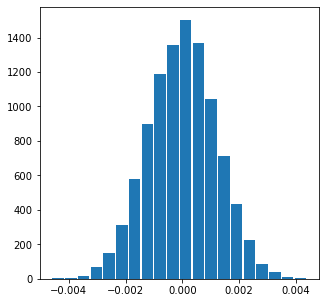

In [197]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(p_diffs,bins=20,rwidth=0.9);

What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [204]:
obs_diff = t_prob - c_prob
obs_diff

-0.0015782389853555567

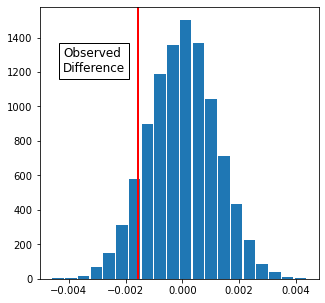

In [223]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(p_diffs,bins=20,rwidth=0.9)
ax.axvline(obs_diff,c='red', linewidth=2)
## ax.axvline(p_diffs.mean()+p_diffs.mean()-obs_diff,c='red', linewidth=2)
ax.text(-0.0042,1200,'Observed\nDifference', bbox={'facecolor':'white'}, fontsize=12);

 In words, explain what you just computed in part j.. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [224]:
np.mean([diff > obs_diff for diff in p_diffs])

0.9062

In [228]:
p_value=(1-np.mean([diff > obs_diff for diff in p_diffs]))*2
p_value

0.1876

p-value is above 0.05, which means we do not have evidence to reject the null hypothesis ( Pnew=Pold ).

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [240]:
convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
convert_old,convert_new

(17489, 17264)

In [239]:
n_old,n_new

(145274, 145310)

m. Now use stats.proportions_ztest to compute your test statistic and p-value. Here is a helpful link on using the built in.

In [248]:
import statsmodels.api as sm


In [249]:
z_score, p_value=sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new])

In [250]:
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

The z-score means that the difference between our test statistic (the difference between conversion rates) and the null hypothesis is 1.31 standard deviations above the mean. This is less than the critical 1.96 we would need to reject the null hypothesis. Additionally, the p-value here is 0.1899, which is not below our alpha of 0.05. This p-value is similar to the previous p-value of 0.1998, so the z-test appears to agree with the previous findings.

In [252]:
from scipy.stats import norm
norm.ppf(1-0.05/2)

1.959963984540054